In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import math


# PART 1

In [404]:
walking_file_name = "walking.csv"

walking = pd.read_csv(walking_file_name, delimiter=";")

In [405]:
# for calculating acceleration magnitude
data_magnitude = walking.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()

In [406]:
allAccelerationX = walking["AccelerationX"]
allAccelerationY = walking["AccelerationY"]
allAccelerationZ = walking["AccelerationZ"]
accelerationMagnitude = data_magnitude
walking["accelerationMagnitude"] = accelerationMagnitude

timestamp = walking.Timestamp - walking.Timestamp.min()
walking["Timestamp"] = timestamp

 # FROM THE WALKING DATA
###We can see that there are obvious stable peaks but a bit complicated because it is not filtered yet, 
###From the obviouseness of the peaks and plot, we can say that this is walking

Text(0, 0.5, 'Acceleration (m^2/s)')

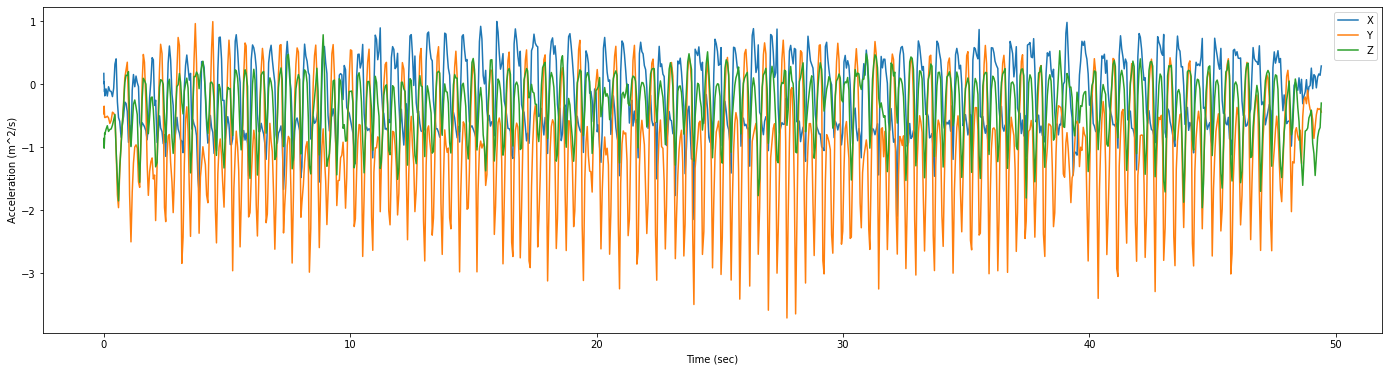

In [407]:
plt.figure(figsize=(24, 6))

plt.plot(timestamp, allAccelerationX, label="X")

plt.plot(timestamp, allAccelerationY, label="Y")

plt.plot(timestamp, allAccelerationZ, label="Z")


plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Acceleration (m^2/s)")

In [408]:
running_file_name = "running.csv"

running = pd.read_csv(running_file_name, delimiter=";")

In [409]:
# for calculating acceleration magnitude
data_magnitude = running.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()

In [410]:
allAccelerationX = running["AccelerationX"]
allAccelerationY = running["AccelerationY"]
allAccelerationZ = running["AccelerationZ"]
accelerationMagnitude = data_magnitude
running["accelerationMagnitude"] = accelerationMagnitude

timestamp = running.Timestamp - running.Timestamp.min()
running["Timestamp"] = timestamp

 # FROM THE RUNNING DATA
###We can see that there are obvious a bit higher peaks than running
###because running is more unstable and moving than walking. We can say that with this much sharper peaks, this is running and we can use that

Text(0, 0.5, 'Acceleration (m^2/s)')

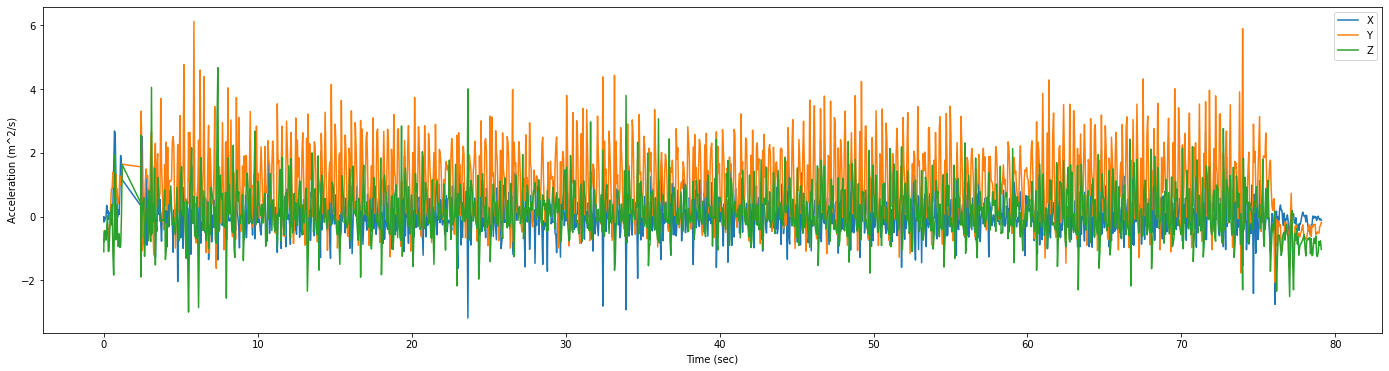

In [411]:
plt.figure(figsize=(24, 6))

plt.plot(timestamp, allAccelerationX, label="X")

plt.plot(timestamp, allAccelerationY, label="Y")

plt.plot(timestamp, allAccelerationZ, label="Z")


plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Acceleration (m^2/s)")

In [412]:
sitting_file_name = "sitting.csv"

sitting = pd.read_csv(sitting_file_name, delimiter=";")

In [413]:
# for calculating acceleration magnitude
data_magnitude = sitting.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()

In [414]:
allAccelerationX = sitting["AccelerationX"]
allAccelerationY = sitting["AccelerationY"]
allAccelerationZ = sitting["AccelerationZ"]
accelerationMagnitude = data_magnitude
sitting["accelerationMagnitude"] = accelerationMagnitude

timestamp = sitting.Timestamp - sitting.Timestamp.min()
sitting["Timestamp"] = timestamp

# FROM THE SITTING DATA
###We can see that this plot is very stable and not much peaks. Current peaks are little movements on the chair but they should be gone after appropriate filtering.
###Therefore, we can say that there are no peaks so steps and not use this.


Text(0, 0.5, 'Acceleration (m^2/s)')

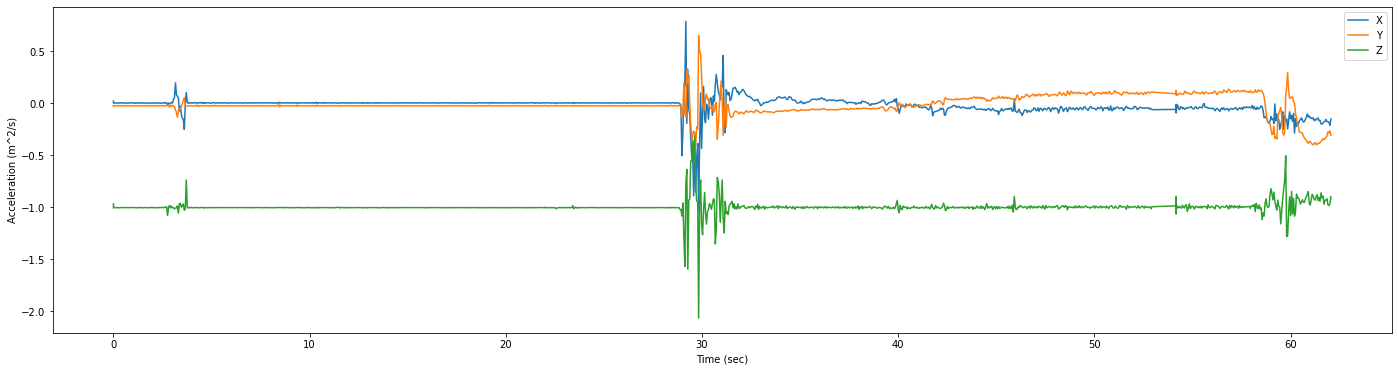

In [415]:
plt.figure(figsize=(24, 6))

plt.plot(timestamp, allAccelerationX, label="X")

plt.plot(timestamp, allAccelerationY, label="Y")

plt.plot(timestamp, allAccelerationZ, label="Z")


plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Acceleration (m^2/s)")

In [416]:
standing_file_name = "standing.csv"

standing = pd.read_csv(standing_file_name, delimiter=";")

In [417]:
# for calculating acceleration magnitude
data_magnitude = standing.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()

In [418]:
allAccelerationX = standing["AccelerationX"]
allAccelerationY = standing["AccelerationY"]
allAccelerationZ = standing["AccelerationZ"]
accelerationMagnitude = data_magnitude
standing["accelerationMagnitude"] = accelerationMagnitude

timestamp = standing.Timestamp - standing.Timestamp.min()
standing["Timestamp"] = timestamp

# FROM THE STANDING DATA
### We can see that this is as stable as sitting with some little movements which are again due to standing and they should be gone with appropriate filtering
### Sitting and standing should be pretty similar and we cannot use both for step counting.

Text(0, 0.5, 'Acceleration (m^2/s)')

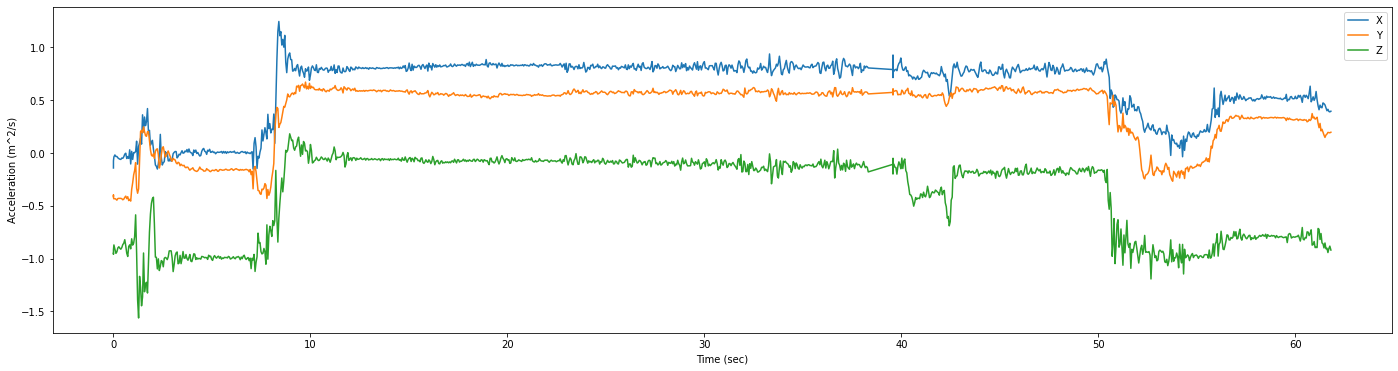

In [419]:
plt.figure(figsize=(24, 6))

plt.plot(timestamp, allAccelerationX, label="X")

plt.plot(timestamp, allAccelerationY, label="Y")

plt.plot(timestamp, allAccelerationZ, label="Z")


plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Acceleration (m^2/s)")

# PART 2

In [420]:
file_name = input("Enter your file name: ")

data = pd.read_csv(file_name, delimiter=";")


Enter your file name: walking.csv


In [421]:
data.head()

,Date,Timestamp,DeviceOrientation,AccelerationX,AccelerationY,AccelerationZ,Label
0,2022-10-24 01:13:32,1.666563e+09,portrait,0.172974,-0.412430,-0.861176,NaN
1,2022-10-24 01:13:32,1.666563e+09,portrait,0.028427,-0.426422,-0.890900,NaN
2,2022-10-24 01:13:32,1.666563e+09,portrait,0.010681,-0.435593,-0.856400,NaN
3,2022-10-24 01:13:32,1.666563e+09,portrait,0.015518,-0.472916,-0.933304,NaN
4,2022-10-24 01:13:32,1.666563e+09,portrait,0.039612,-0.346313,-1.012985,NaN


In [422]:
data.keys()

Index(['Date', 'Timestamp', 'DeviceOrientation', 'AccelerationX',
       'AccelerationY', 'AccelerationZ', 'Label'],
      dtype='object')

In [423]:
data.dtypes

Date                  object
Timestamp            float64
DeviceOrientation     object
AccelerationX        float64
AccelerationY        float64
AccelerationZ        float64
Label                float64
dtype: object

In [424]:
# for calculating acceleration magnitude
data_magnitude = data.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()

In [425]:
allAccelerationX = data["AccelerationX"]
allAccelerationY = data["AccelerationY"]
allAccelerationZ = data["AccelerationZ"]
accelerationMagnitude = data_magnitude
data["accelerationMagnitude"] = accelerationMagnitude

timestamp = data.Timestamp - data.Timestamp.min()
data["Timestamp"] = timestamp

Text(0, 0.5, 'Acceleration (m^2/s)')

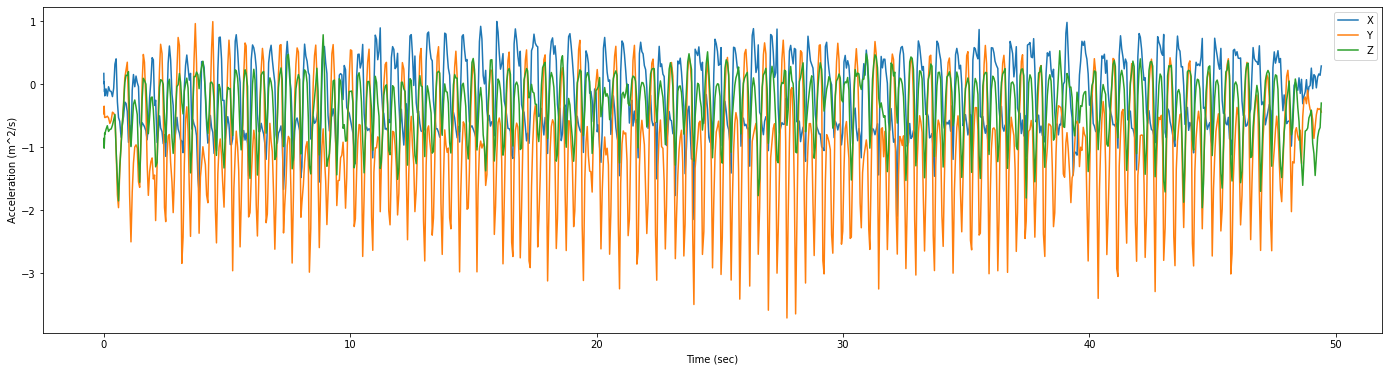

In [426]:
plt.figure(figsize=(24, 6))

plt.plot(timestamp, allAccelerationX, label="X")

plt.plot(timestamp, allAccelerationY, label="Y")

plt.plot(timestamp, allAccelerationZ, label="Z")


plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Acceleration (m^2/s)")

Text(0, 0.5, 'Acceleration (m^2/s)')

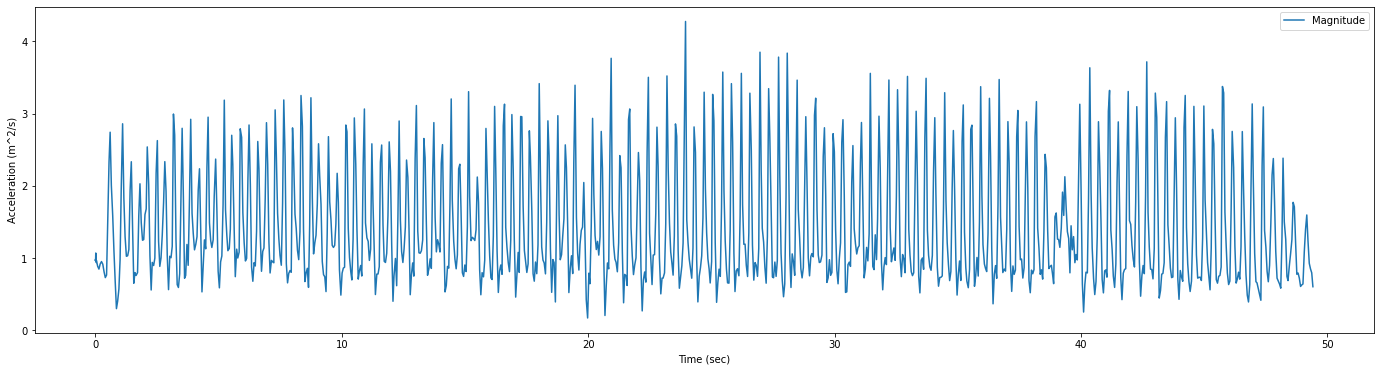

In [427]:
plt.figure(figsize=(24, 6))

plt.plot(timestamp, accelerationMagnitude, label="Magnitude")

plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Acceleration (m^2/s)")

###Basically, this is the graph of all accelerations in terms of each 3 dimensions.

To have better understanding, we should zoom in.

In [428]:
accelerationX_1 = data["AccelerationX"][:100]
accelerationY_1 = data["AccelerationY"][:100]
accelerationZ_1 = data["AccelerationZ"][:100]
accelerationMagnitude_1 = accelerationMagnitude[:100]
timestamp_1 = timestamp[:100]


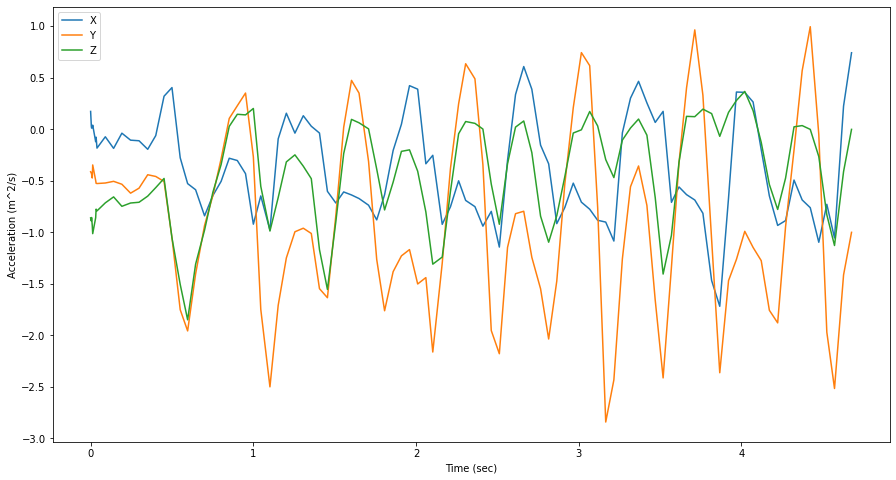

In [429]:
plt.figure(figsize=(15, 8))

plt.plot(timestamp_1, accelerationX_1, label="X")

plt.plot(timestamp_1, accelerationY_1, label="Y")

plt.plot(timestamp_1, accelerationZ_1, label="Z")


plt.xlabel("Time (sec)")
plt.ylabel("Acceleration (m^2/s)")
plt.legend()
plt.show()
# this plot is just for zooming in and better visualization for peaks

In [430]:
def LPF(fs):
    N = 25
    n = np.arange(N)
    fc = 0.5 / fs # gave cut off 0.5Hz
    h = (0.42-0.5*np.cos(2*np.pi*n/(N-1))+0.8*np.cos(4*np.pi*n/(N-1))) * np.sinc(2*fc*(n-(N-1)/2))
    # normalize and return h
    h = h/sum(h)
    return h

# formula is taken from the lecture slides (discrete convolution)
def convolve_signal(data, filter):
    filtered_data = []
    for i in range(len(data) + len(filter) - 1):
        y = 0
        for j in range(len(filter)):
            if (0 <= i-j < len(data)):
                y += data[i-j] * filter[j]
        filtered_data.append(y)
    # ceil filter size / 2 for first and last is not important. It is emitted
    return filtered_data[len(filter)// 2 : (len(filtered_data) - (len(filter)//2))]

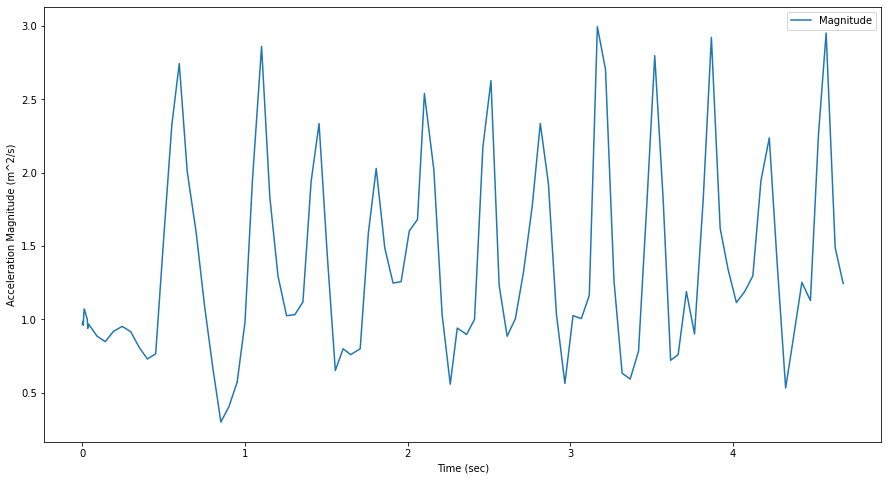

In [431]:
plt.figure(figsize=(15, 8))

plt.plot(timestamp_1, accelerationMagnitude_1, label="Magnitude")


plt.xlabel("Time (sec)")
plt.ylabel("Acceleration Magnitude (m^2/s)")
plt.legend()
plt.show()
# filtered result of the first 100 data points

In [432]:
def peak_finder(filtered_signal, map, filtered_timestamp):
  starting_point = 1
  peaks = 0
  for i in range(starting_point, len(filtered_signal)-1):
 
    # finding the local maxima by checking direct neighbours
    if (filtered_signal[i-1] < filtered_signal[i] and filtered_signal[i+1] < filtered_signal[i] and filtered_timestamp[i] not in map.keys()):
      peaks += 1
      map[filtered_timestamp[i]] = True
     
  return peaks

In [433]:
data.head().style

,Date,Timestamp,DeviceOrientation,AccelerationX,AccelerationY,AccelerationZ,Label,accelerationMagnitude
0,2022-10-24 01:13:32,0.000000,portrait,0.172974,-0.412430,-0.861176,nan,0.970382
1,2022-10-24 01:13:32,0.004496,portrait,0.028427,-0.426422,-0.890900,nan,0.988102
2,2022-10-24 01:13:32,0.005998,portrait,0.010681,-0.435593,-0.856400,nan,0.960872
3,2022-10-24 01:13:32,0.010047,portrait,0.015518,-0.472916,-0.933304,nan,1.046397
4,2022-10-24 01:13:32,0.012843,portrait,0.039612,-0.346313,-1.012985,nan,1.071280


In [434]:
# Filtering usage
sampling_frequency = data.shape[0] / (data["Timestamp"].max() - data["Timestamp"].min())
filter = LPF(sampling_frequency)
filtered_data = convolve_signal(data["accelerationMagnitude"].to_numpy(), filter)

In [435]:
map = {}
peaks = 0
window_size = 21
#Window size can be taken as input on the below line
#window_size = int(input("Window size: "))
print("Window size: ", window_size)

for i in range(len(data)-window_size+1):

  peaks += peak_finder(filtered_data, map, data["Timestamp"].to_numpy())

print(peaks)

Window size:  21
117


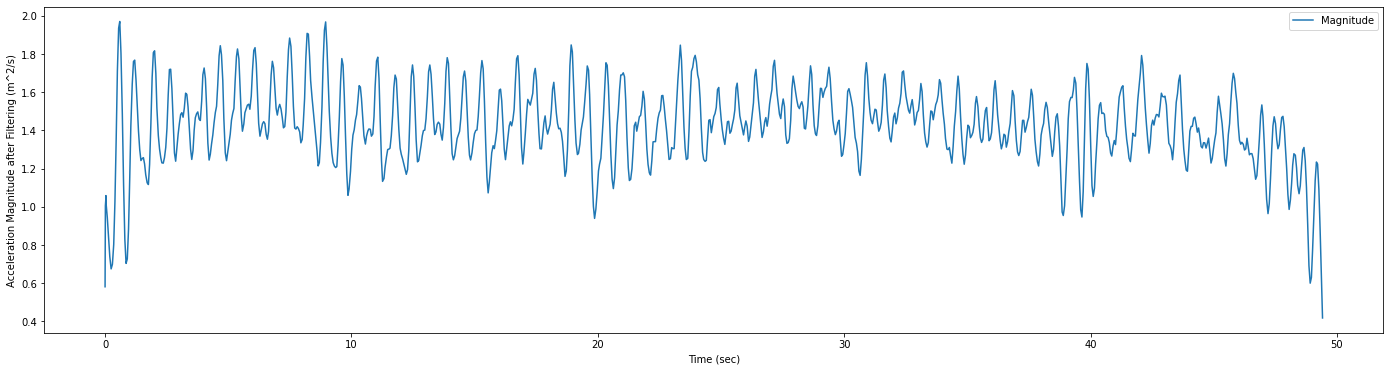

In [436]:
plt.figure(figsize=(24, 6))
plt.plot(data["Timestamp"], filtered_data, label="Magnitude")


plt.xlabel("Time (sec)")
plt.ylabel("Acceleration Magnitude after Filtering (m^2/s)")
plt.legend()
plt.show()
# plot is for the all signal data's filtered result